## Python Distribution And Sampling on Movie Reviews
We will be working on fandango_score_comparison.csv which was originally created from FiveThirtyEight Github account. Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

FILM -- the name of the movie.

RottenTomatoes -- the RottenTomatoes (RT) critic score.

RottenTomatoes_User -- the RT user score.

Metacritic -- the Metacritic critic score.

Metacritic_User -- the Metacritic user score.

IMDB -- the IMDB score given to the movie.

Fandango_Stars -- the number of stars Fandango gave the movie.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
movies = pd.read_csv("Probability_and_Statistics_in_Python\\fandango_score_comparison.csv")


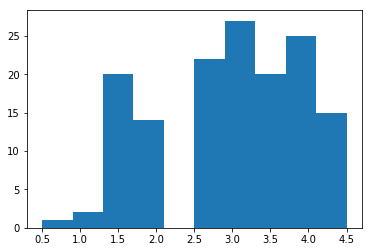

In [6]:
plt.hist(movies["Metacritic_norm_round"]);

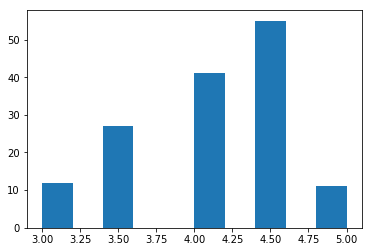

In [7]:
plt.hist(movies["Fandango_Stars"]);

In [9]:
# calcualte mean,median and sd 

fandango_mean = movies["Fandango_Stars"].mean()
meta_mean = movies["Metacritic_norm_round"].mean()

print(fandango_mean)

print(meta_mean)

4.089041095890411
2.9726027397260273


In [10]:
fandango_median = movies["Fandango_Stars"].median()
meta_median = movies["Metacritic_norm_round"].median()

print(fandango_median)
print(meta_median)

4.0
3.0


In [12]:
fandango_std = movies["Fandango_Stars"].std()
meta_std = movies["Metacritic_norm_round"].std()

print(fandango_std)

print(meta_std)

0.5403859779787333
0.9909605613743364


In [28]:
# Make a scatterplot that compares the Fandango_Stars column to the Metacritic_norm_round column.
# print top 5 movies with the biggest differences between Fandango_Stars and Metacritic_norm_round.
movies["abs_diff"] = abs(movies["Fandango_Stars"] - movies["Metacritic_norm_round"])
movies = movies.sort_values(by="abs_diff",ascending=False)

movies.head(5)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,abs_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0
35,The Loft (2015),11,40,24,2.4,6.3,4.0,3.6,0.55,2.00,...,0.5,2.0,1.0,1.0,3.0,80,21319,811,0.4,3.0
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,0.5,2.5,1.5,2.5,3.0,240,104235,6757,0.4,3.0


In [42]:
# calcualte the r value and linear regression to measure correlation between Fandango_Stars and Metacritic_norm_round 

from scipy.stats import pearsonr,linregress

rvalue = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print(rvalue)
slope, intercept, r_value, p_value, std_err = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(slope,intercept,r_value)
print(intercept+(slope*3))



(0.17844919073895918, 0.031161516228523815)
0.0973110779739 3.7997739189 0.178449190739
4.09170715282


(1, 5)

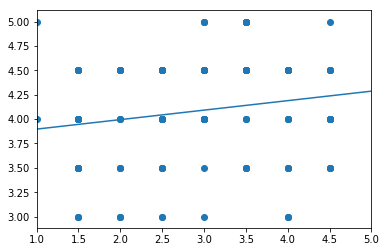

In [48]:
# create a residual plot to better visualize how the line relates to the existing datapoints. 

plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
prd_1 = 1 * slope + intercept
prd_2 = 2 * slope + intercept
prd_3 = 3 * slope + intercept
prd_4 = 4 * slope + intercept
prd_5 = 5 * slope + intercept
plt.plot([1,2,3,4,5],[prd_1,prd_2,prd_3,prd_4,prd_5]);
